# Importando libs de interesse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import shap
from umap import UMAP
import warnings
pd.options.display.float_format = '{:.2f}'.format


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 22000000)
pd.set_option('display.width', 400)
warnings.filterwarnings('ignore')

# Recuperando melhor modelo e dados

In [2]:
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train = pd.read_csv('y_train.csv')

In [3]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
model

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=25, min_samples_split=50,
                       n_estimators=200, random_state=0)

# Explicabilidade com Shap Values

In [5]:
explainer = shap.TreeExplainer(model, data=X_test)

In [6]:
shap_values = explainer.shap_values(X_test, y=y_test)

100%|===================| 112581/112636 [16:51<00:00]        

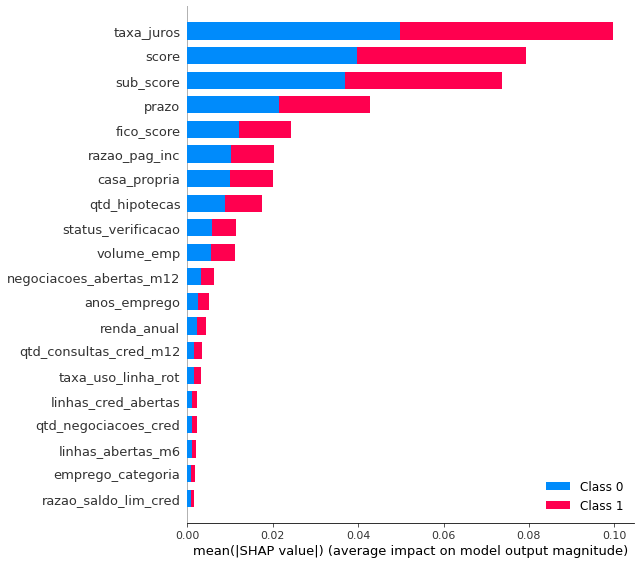

In [9]:
shap.summary_plot(shap_values, X_test)

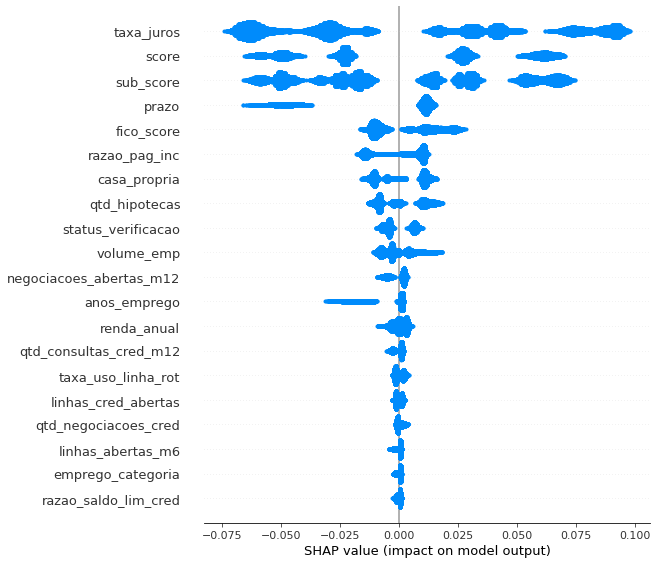

In [27]:
shap.summary_plot(shap_values[0], plot_type='dot', features=X_test.columns.tolist())

In [28]:
shap_values = explainer.shap_values(X_test)

100%|===================| 112596/112636 [16:27<00:00]        

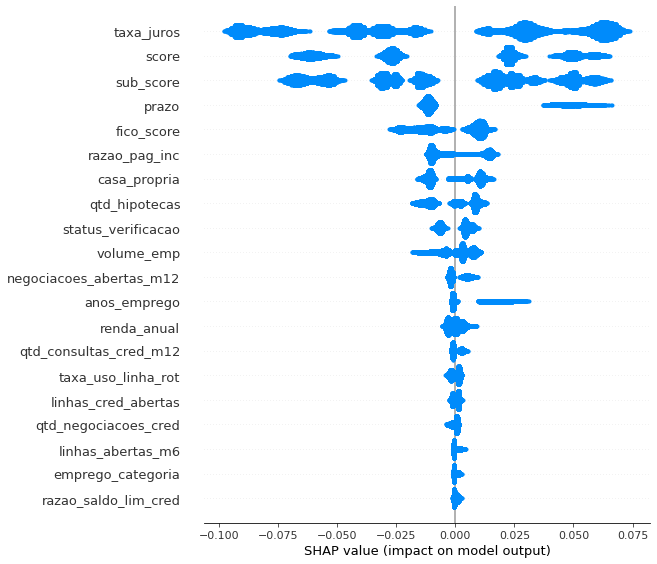

In [32]:
shap.summary_plot(shap_values[1], plot_type='dot', features=X_test.columns.tolist())

# Embedding

In [10]:
leaves = model.apply(X_train)

In [11]:
embed = UMAP(metric='hamming', random_state=0).fit_transform(X_train)

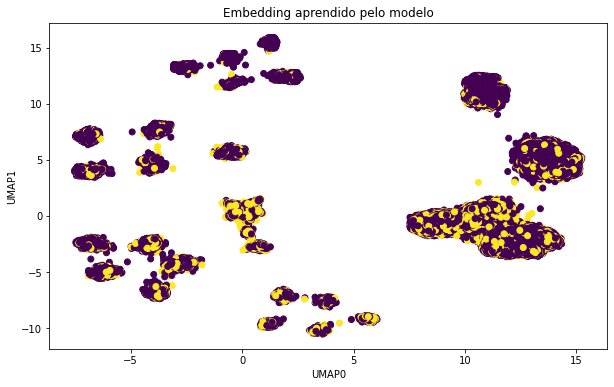

In [15]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(embed[:, 0], embed[:, 1], c=y_train.values, cmap='viridis')
plt.xlabel('UMAP0')
plt.ylabel('UMAP1')
plt.title('Embedding aprendido pelo modelo')
plt.show()